<a href="https://colab.research.google.com/github/PaulaDeglane/my_first_repo/blob/master/ENTREGABLE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importación**

In [803]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [804]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder # Librería para crear modelos de ML


In [805]:

df= pd.read_csv("/content/drive/MyDrive/NUCLIO DIGITAL SCHOOL/Colab Notebooks/ENTREGABLE 1/bmw_pricing_v3 (1).csv", sep=",")
df.head(20)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


# **Inspección de datos**

In [806]:
df.info() #Nos muestra el tipo de datos, vemos que no hay enteros, y bastantes categoricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [807]:
df.describe() #estadística descriptiva

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [808]:
df.shape #dimensión. Tenemos 4843 filas y 18 columnas

(4843, 18)

In [809]:
df.columns #nombres de las columnas

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta'],
      dtype='object')

# **Detección de duplicados**

In [810]:
df.duplicated().sum() #Vemos que no hay duplicados

0

#**PREGUNTA 1: Eliminar columnas inicialmente del dataset**


In [811]:
df.nunique() #Vemos que podemos eliminar marca ya que es obvio que son todos de la marca BMW y al tener solo 1 valor no proporciona distintas informaciones

,0
marca,1
modelo,76
km,4784
potencia,61
fecha_registro,180
tipo_gasolina,5
color,10
tipo_coche,8
volante_regulable,2
aire_acondicionado,2


In [812]:
for i in df.columns:
    if df[i].nunique() == 1:
        print(i)
#Podemos hacer un loop para que nos diga aquellas columnas que solo tienen un valor.

marca


In [813]:
df.drop(columns='marca', axis=1, inplace=True) #Eliminamos la columna "marca" y usamos inplace para que la eliminación sea de forma permanente en el dataframe


In [814]:
df

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


# **Manejo de NULOS**

In [815]:
df_2=df.copy()#hacemos una copia del dataframe y manejaremos los nulos a partir del df_2

In [816]:
df.isnull().any().sum() #Vemos que hay 16 nulos

16

In [817]:
df_2.isnull().sum() #Vemos cuantos nulos hay en cada variable

,0
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486
camara_trasera,2


##**Analisis de cada variable Nulo**



### **MODELO**

In [818]:
df_2[df_2["modelo"].isnull()] #Vemos los nulos de la columna modelo

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [819]:
df_2.dropna(subset=["modelo"], inplace=True) #Eliminamos los nulos de la columna modelo

In [820]:
df_2[df_2["modelo"].isnull()] #Comprobamos que no quedan nulos en la columna modelo

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


###**KM y potencia**

In [821]:
df_2[df_2["km"].isnull()]  #Vemos los nulos de la columna km

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [822]:
df_2.dropna(subset=["km"], inplace=True) #Eliminamos los nulos de la columna km

In [823]:
df_2[df_2["potencia"].isnull()]  #Vemos los nulos de la columna potencia

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01


In [824]:
df_2.dropna(subset=["potencia"],inplace=True) #Eliminamos los nulos de la columna potencia

In [825]:
df_2[df_2["potencia"].isnull()| df_2["km"].isnull()] #Comprobamos que no quedan nulos en las columnas km y potencia

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


### **Camara_trasera, elevalunas_electrico,fecha_venta**

In [826]:
df_2[df_2["camara_trasera"].isnull()] #Vemos los nulos de la columna camara_trasera al ser solo dos filas las podemos eliminar

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,2011-12-01,diesel,NaN,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,NaN,diesel,black,estate,False,True,NaN,NaN,True,NaN,True,NaN,11700.0,2018-04-01


In [827]:
df_2.dropna(subset= ["camara_trasera"],inplace=True)

In [828]:
df_2[df_2["fecha_venta"].isnull() | df_2["elevalunas_electrico"].isnull()] #Vemos los nulos en las columnas fecha_venta y elevalunas_electrico, como son solo 3 filas las eliminamos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,2012-04-01,diesel,NaN,coupe,True,True,False,NaN,NaN,True,True,True,36300.0,2018-02-01
305,535,148738.0,230.0,NaN,diesel,grey,estate,True,True,True,NaN,NaN,False,True,True,28800.0,2018-01-01
594,525,269290.0,120.0,NaN,diesel,silver,NaN,True,False,True,NaN,False,False,True,True,4200.0,NaN


In [829]:
df_2.dropna(subset= ["fecha_venta","elevalunas_electrico"],inplace=True)

### **Tipo_gasolina,volante_regulable**

In [830]:
df_2[df_2["tipo_gasolina"].isnull()] #Vemos los nulos de la columna tipo_gasolina

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaN,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01


In [831]:
df_2[df_2["modelo"]=="318"].value_counts("tipo_gasolina") #Comprobamos si todos los modelos 318 son diesel para poder asignarlo a los NaN, pero observamos que tambien hay petrol, por lo que lo eliminamos

,count
tipo_gasolina,
diesel,553
petrol,11
Diesel,1


In [832]:
df_2.dropna(subset= ["tipo_gasolina"],inplace=True)


In [833]:
df_2[df_2["volante_regulable"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,2013-01-01,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
273,318,195032.0,100.0,2008-01-01,diesel,grey,NaN,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
489,320,227691.0,135.0,NaN,diesel,black,NaN,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
614,318,201626.0,105.0,2013-10-01,diesel,black,NaN,NaN,NaN,False,NaN,True,False,True,True,11700.0,2018-03-01


In [834]:
df_2.dropna(subset= ["volante_regulable"],inplace=True)


###**Precio**

In [835]:
df_2[df_2["precio"].isnull()] #Vemos los nulos de la columna precio

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,NaN,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,NaN,diesel,black,estate,True,False,False,NaN,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,NaN,diesel,blue,estate,True,NaN,True,False,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,NaN,diesel,blue,NaN,True,True,False,NaN,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,NaN,diesel,blue,NaN,False,True,False,NaN,False,False,True,False,NaN,2018-03-01


In [836]:
df_3=df_2.copy()

In [837]:
mean_price=df_3["precio"].mean() #Calculamos la media del precio
print(mean_price)

15841.831015154661


In [838]:
df_3['precio'].fillna(mean_price, inplace=True) #Sustituimos los valores nulos con la media del precio.

In [839]:
mean_price

15841.831015154661

In [840]:
df_3[df_3["precio"].isnull()] #Comprobamos que no queden nulos en la columna precio

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [841]:
df_3.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,2414
tipo_gasolina,0
color,443
tipo_coche,1451
volante_regulable,0
aire_acondicionado,483
camara_trasera,0


In [842]:
df_3[df_3["fecha_registro"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,218 Gran Tourer,47782.0,110.0,NaN,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4835,218 Active Tourer,165707.0,110.0,NaN,diesel,black,van,False,True,False,NaN,False,NaN,True,True,13600.0,2018-07-01
4837,218 Gran Tourer,66770.0,110.0,NaN,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01


### **Fecha_registro**

In [843]:
df_3.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,2414
tipo_gasolina,0
color,443
tipo_coche,1451
volante_regulable,0
aire_acondicionado,483
camara_trasera,0


In [844]:
df_4=df_3.copy()

In [845]:
df_4["fecha_registro"].fillna(df_4.groupby("modelo")["fecha_registro"].transform('first'), inplace=True)
#Se imputa la fecha del registro a los nulos que sea del mismo modelo.

In [846]:
df_4.isnull().sum()
#Vemos que quedan 18 nulos, esas filas las podemos eliminar ya que no se les puede asignar un valor de referencia.

,0
modelo,0
km,0
potencia,0
fecha_registro,18
tipo_gasolina,0
color,443
tipo_coche,1451
volante_regulable,0
aire_acondicionado,483
camara_trasera,0


In [847]:
df_4["fecha_registro"].dropna(inplace=True)

In [848]:
df_4.dropna(subset= ["fecha_registro"],inplace=True)


In [849]:
df_4["fecha_registro"].isnull().sum()

0

In [850]:
df_4

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,2015-02-01,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-03-01,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [851]:
df_4.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,442
tipo_coche,1445
volante_regulable,0
aire_acondicionado,482
camara_trasera,0


### **Color**

In [852]:
df_4[df_4["color"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,2009-01-01,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,2014-05-01,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,X3,74091.0,105.0,2014-03-01,diesel,NaN,suv,True,False,False,NaN,True,False,True,True,31100.0,2018-08-01
4757,X4,61989.0,140.0,2014-12-01,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4777,X5,285669.0,173.0,2007-08-01,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4805,218 Active Tourer,35382.0,110.0,2015-06-01,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01


In [853]:
df_5=df_4.copy()

In [854]:
df_5["color"].fillna("No info", inplace=True) #Imputamos los valores nulos por "No info"

In [855]:
df_5["color"].isnull().sum()

0

In [856]:
df_5.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
tipo_coche,1445
volante_regulable,0
aire_acondicionado,482
camara_trasera,0


### **Tipo_coche**

In [857]:
df_5["tipo_coche"].fillna("No info", inplace=True) #Imputamos los valores nulos por "No info"

In [858]:
df_5["tipo_coche"].isnull().sum()

0

### **Aire_acondicionado,bluetooth,alerta_lim_velocidad**


In [859]:
df_5

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,No info,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,2015-02-01,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,No info,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-03-01,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
5,335,152352.0,225.0,2011-05-01,petrol,black,No info,True,True,False,False,True,True,True,True,17100.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,No info,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,No info,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [860]:
df_5[df_5["aire_acondicionado"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
12,420,132025.0,135.0,2014-03-01,diesel,blue,No info,True,NaN,False,False,True,True,True,NaN,21700.0,2018-03-01
16,220,21167.0,135.0,2015-07-01,petrol,white,convertible,False,NaN,True,NaN,False,False,False,True,21900.0,2018-04-01
28,Z4,123809.0,125.0,2005-05-01,petrol,black,convertible,True,NaN,False,NaN,False,True,True,False,6500.0,2018-05-01
40,420,36696.0,120.0,2014-03-01,diesel,black,convertible,True,NaN,False,NaN,True,False,True,True,34300.0,2018-07-01
49,118,147180.0,100.0,2012-05-01,diesel,No info,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,216 Active Tourer,193657.0,85.0,2015-03-01,diesel,silver,van,False,NaN,False,NaN,False,False,True,False,8900.0,2018-09-01
4818,X3,110039.0,130.0,2009-07-01,diesel,No info,No info,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01
4820,Active Tourer,48380.0,100.0,2014-10-01,diesel,black,van,True,NaN,False,NaN,False,NaN,True,False,19000.0,2018-05-01
4834,218 Gran Tourer,47782.0,110.0,2015-10-01,diesel,blue,No info,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01


In [861]:
df_5["aire_acondicionado"].fillna(df_5.groupby("modelo")["aire_acondicionado"].transform('first'), inplace=True)
df_5["bluetooth"].fillna(df_5.groupby("modelo")["bluetooth"].transform('first'), inplace=True)
df_5["alerta_lim_velocidad"].fillna(df_5.groupby("modelo")["alerta_lim_velocidad"].transform('first'), inplace=True)
#Se imputa a los nulos de aire acondicionado, bluetooth,alerta_lim_velocidad según el primer modelo de cada una de ellas

In [862]:
df_5.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,2
camara_trasera,0


In [863]:
df_5.dropna(subset= ["aire_acondicionado"],inplace=True)
df_5.dropna(subset= ["bluetooth"],inplace=True)
df_5.dropna(subset= ["alerta_lim_velocidad"],inplace=True)

In [864]:
df_5.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0


### **Asientos_traseros_plegables**

In [865]:
df_5["asientos_traseros_plegables"].value_counts() #Se puede observar que la mayoria NO tienen asientos plegables y la cantidad de nulos es execiva por lo que carece de sentido asignar un valor

,count
asientos_traseros_plegables,
False,1138
True,301


In [866]:
df_5.drop(columns='asientos_traseros_plegables', axis=1, inplace=True)

In [867]:
df_5.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0


# **Variables numéricas y categóricas**

In [868]:
df_5.shape #Observamos el cambio de 4843 filas y 18 columnas a 4802 filas y 16 columnas.

(4802, 16)

In [869]:
df_5.describe() #Observamos que hay outliers en km y potencia por ejemplo en los mínimos.

,km,potencia,precio
count,4.802000e+03,4802.000000,4802.000000
mean,1.411893e+05,128.660766,15810.339647
std,6.013870e+04,38.516179,9137.298412
min,-6.400000e+01,0.000000,100.000000
25%,1.032230e+05,100.000000,10900.000000
50%,1.411845e+05,120.000000,14200.000000
75%,1.752652e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [870]:
df_6=df_5.copy() #Creamos una copia del DF.

In [871]:
for i in df_6:
  print(i,df_6[i].dtype.kind)

modelo O
km f
potencia f
fecha_registro O
tipo_gasolina O
color O
tipo_coche O
volante_regulable O
aire_acondicionado O
camara_trasera O
elevalunas_electrico O
bluetooth O
gps b
alerta_lim_velocidad O
precio f
fecha_venta O


modelo 
 modelo
320                749
520                631
318                563
X3                 437
116                358
                  ... 
M4                   2
430                  2
ActiveHybrid 5       1
635                  1
214 Gran Tourer      1
Name: count, Length: 61, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
fecha_registro 
 fecha_registro
2012-04-01    422
2014-06-01    337
2014-03-01    320
1995-10-01    278
2012-09-01    239
             ... 
2001-09-01      1
2006-11-01      1
1994-01-01      1
2001-02-01      1
2005-09-01      1
Name: count, Length: 180, dtype: int64 

tipo_gasolina 
 tipo_gasolina
diesel           4607
petrol            180
hybrid_petrol       7
Diesel              5
electro             3
Name: count, dtype: int64 

color 
 color
black      1484
grey       1059
blue        645
white       477
No info     442
brown       302
silver      289
red          47
beige        37
green        14
or

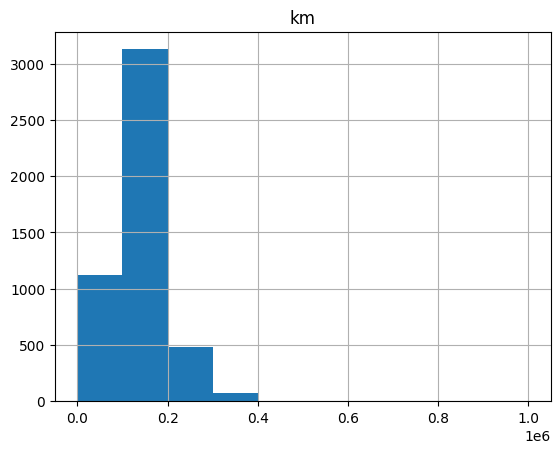

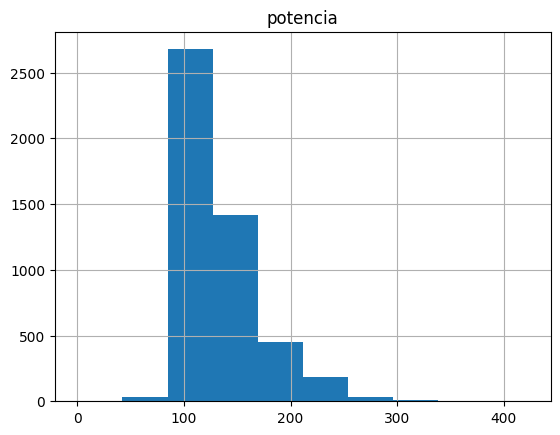

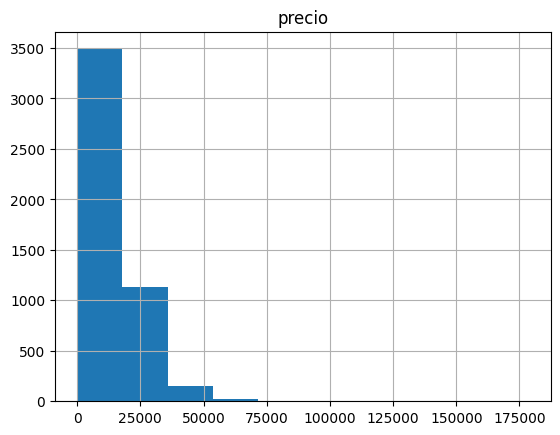

In [872]:
for i in df_6:
  if df_6[i].dtype.kind == "O":
    print(i,'\n', df_6[i].value_counts(), '\n')
  elif (df_6[i].dtype.kind=="f") or (df_6[i].dtype.kind=="i"):
    print(df_6.hist(i))

## **Variables numéricas**

### **Variable km**

In [873]:
df_6['km'].min() #Vemos que hay km negativos y eso es imposible

-64.0

In [874]:
df_6[(df_6['km']<0) | (df_6['km']>500000)] #Vemos que hay outliers

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,640 Gran Coupé,-64.0,230.0,2014-10-01,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01
3732,118,1000376.0,90.0,2005-03-01,diesel,No info,No info,True,False,False,False,True,True,False,1400.0,2018-06-01


In [875]:
df_6['km']= np.where(df_6['km']<0,df_6["km"].mean(),df_6['km']) #Sustituimos los valores negativos por la media de la columna
df_6["km"]= np.where(df_6["km"]>500000,df_6["km"].mean(),df_6["km"]) #Sustituimos los valores mayores a 500000 por la media de la columna

### **Variable potencia**

In [876]:
df_6["potencia"].min() #Vemos que hay potencia a 0 y no tiene sentido porque sino el coche no funcionaria por lo que tambien la vamos a sustituir por la media

0.0

In [877]:
df_6[(df_6['potencia']<=60)] #Buscamos si hay coches con menos de 60 cv

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328.0,25.0,2014-03-01,hybrid_petrol,black,No info,False,True,False,False,False,True,True,20300.0,2018-04-01
1925,i3,152470.0,25.0,2014-03-01,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,2018-03-01
3765,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,11700.0,2018-03-01


In [878]:
df_6['potencia']= np.where(df_6['potencia']<60,df_6["potencia"].mean(),df_6['potencia']) #Sustituimos los valores que son menores a 60 cv por la media de la columna

## **Variables categóricas**

### **modelo**

In [879]:
df_6["modelo"].value_counts()

,count
modelo,
320,749
520,631
318,563
X3,437
116,358
...,...
M4,2
430,2
ActiveHybrid 5,1


In [880]:
def obten_lista_eliminar(dataset, columna, umbral):

  lista_borrar = []
  tabla = dataset[columna].value_counts().reset_index()
  print(tabla)

  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])

  return lista_borrar

#Se crea una función para poder eliminar aquellos valores que aparecen pocas veces

<Axes: xlabel='modelo'>

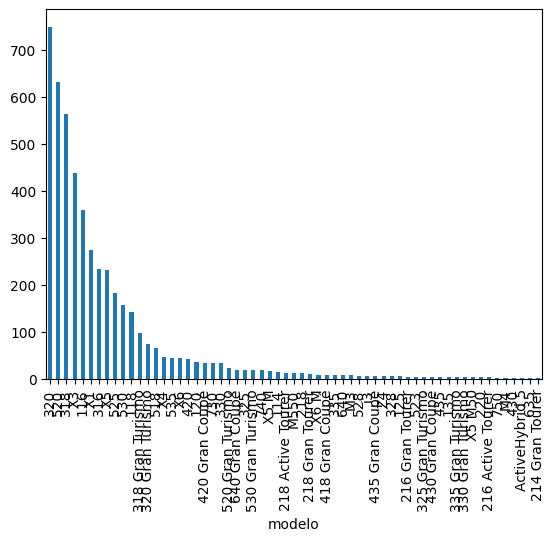

In [881]:
df_6['modelo'].value_counts().plot(kind='bar')

In [882]:
df_7=df_6.copy()

In [883]:
lista_borrar = obten_lista_eliminar(df_7, 'modelo', 30)

             modelo  count
0               320    749
1               520    631
2               318    563
3                X3    437
4               116    358
..              ...    ...
56               M4      2
57              430      2
58   ActiveHybrid 5      1
59              635      1
60  214 Gran Tourer      1

[61 rows x 2 columns]


In [884]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [885]:
eliminar_lista_df(df_7, 'modelo', lista_borrar)

In [886]:
df_7['modelo'].value_counts()

,count
modelo,
320,749
520,631
318,563
X3,437
116,358
X1,274
316,234
X5,231
525,182


### **tipo gasolina**

In [887]:
df_7['tipo_gasolina'].value_counts() #vemos que tenemos dos variables nombradas igual pero escritas de manera distinita: Diesel,diesel

,count
tipo_gasolina,
diesel,4376
petrol,124
Diesel,5
hybrid_petrol,3


In [888]:
df_7['tipo_gasolina'] = np.where(df_7['tipo_gasolina'] == 'Diesel', 'diesel', df_7['tipo_gasolina'])
#Reemplazar Diesel por diesel

In [889]:
df_7["tipo_gasolina"].value_counts() #Vemos que ya no hay Diesel y solo hay 3 de hybrid_petrol por lo que se podrían eliminar ya que no influye mucho en el dataset.

,count
tipo_gasolina,
diesel,4381
petrol,124
hybrid_petrol,3


In [890]:
lista_borrar = obten_lista_eliminar(df_7, 'tipo_gasolina', 4)

   tipo_gasolina  count
0         diesel   4381
1         petrol    124
2  hybrid_petrol      3


In [891]:
eliminar_lista_df(df_7, 'tipo_gasolina', lista_borrar)

In [892]:
df_7['tipo_gasolina'].value_counts()

,count
tipo_gasolina,
diesel,4381
petrol,124


### **color y tipo_coche**

In [893]:
df_7["color"].value_counts()

,count
color,
black,1395
grey,995
blue,600
white,446
No info,418
brown,290
silver,269
red,42
beige,33


In [894]:
def combinar (dataset,columna,umbral):

  lista= []
  tabla = dataset[columna].value_counts().reset_index()

  for i in range(len(tabla)):
      if tabla.iloc[i]["count"] <= umbral:
         lista.append(tabla.iloc[i][columna])

  return lista
#creamos una función con el objetivo de identificar los colores que tienen un conteo inferior o igual a un umbral (418) y añadirlos a una lista.

In [895]:
lista_color= combinar (df_7,"color",418) #creamos la variables lista_color donde se aplica la funcion combinar
lista_tipo_coche= combinar (df_7,"tipo_coche",80) #creamos la variables lista_tipo_coche donde se aplica la funcion combinar


In [896]:
df_7.loc[df_7["color"].isin(lista_color), "color"] = "otro" #sustituimos aquellos valores de la lista en "otro"
df_7.loc[df_7["tipo_coche"].isin(lista_tipo_coche), "tipo_coche"] = "otro"

In [897]:
df_7["color"].value_counts()


,count
color,
black,1395
otro,1069
grey,995
blue,600
white,446


In [898]:
df_7 ["tipo_coche"].value_counts()

,count
tipo_coche,
No info,1357
estate,1083
sedan,773
suv,733
hatchback,424
otro,135


<Axes: >

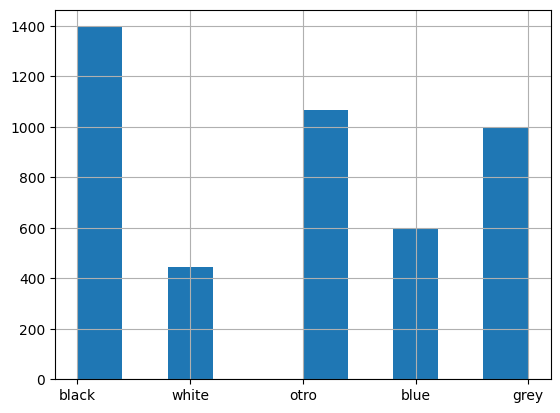

In [899]:
df_7["color"].hist()

### **fecha_venta**

In [900]:
df_7["fecha_venta"].value_counts()

,count
fecha_venta,
2018-05-01,731
2018-03-01,690
2018-04-01,637
2018-06-01,573
2018-07-01,504
2018-08-01,496
2018-02-01,466
2018-09-01,205
2018-01-01,199


In [901]:
lista_fecha_eliminar= combinar (df_7,"fecha_venta",100) #creamos la variables lista_color donde se aplica la funcion combinar
print(lista_fecha_eliminar)

['2007-08-01', '2010-04-01', '2009-04-01', '2008-06-01']


In [902]:
df_8=df_7.copy()

In [903]:
df_9=df_7.copy()

In [904]:
df_9 = df_9.loc[~df_9["fecha_venta"].isin(lista_fecha_eliminar)] #Elimina todas las filas de df_8 donde "fecha_venta" esté en la lista lista_fecha_eliminar. Hacemos una eliminación por filtración

In [905]:
df_9["fecha_venta"].value_counts()

,count
fecha_venta,
2018-05-01,731
2018-03-01,690
2018-04-01,637
2018-06-01,573
2018-07-01,504
2018-08-01,496
2018-02-01,466
2018-09-01,205
2018-01-01,199


### **variables histogramas**

modelo 
 modelo
320                 747
520                 631
318                 563
X3                  437
116                 358
X1                  274
316                 233
X5                  229
525                 182
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
X4                   46
535                  45
420                  43
X6                   43
120                  36
420 Gran Coupé       33
730                  33
330                  32
Name: count, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
fecha_registro 
 fecha_registro
2012-04-01    420
2014-06-01    336
2014-03-01    295
1995-10-01    278
2012-09-01    228
             ... 
1990-03-01      1
2016-05-01      1
2006-11-01      1
1994-01-01      1
2005-09-01      1
Name: count, Length: 178, dtype: int64 

tipo_gasolina 
 tipo_gasolina
diesel    4377
petrol     124
Name: count, dtype: i

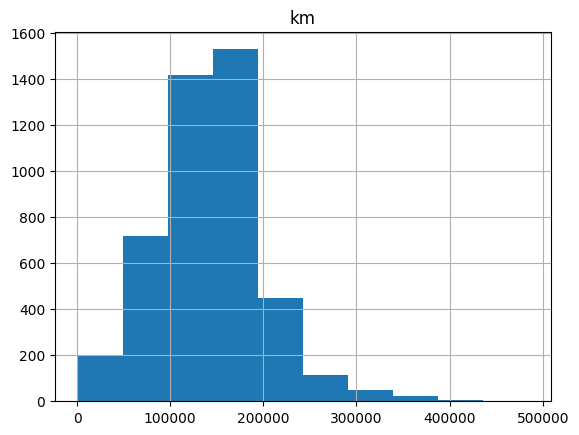

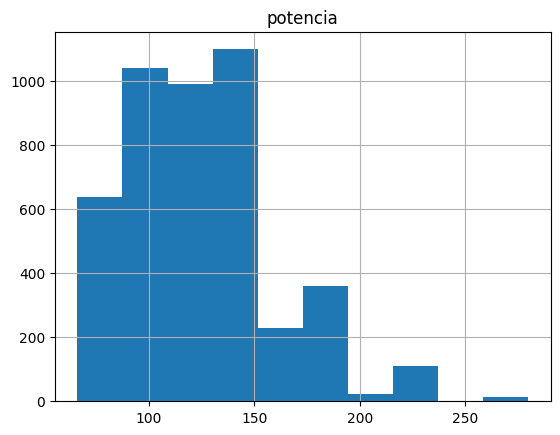

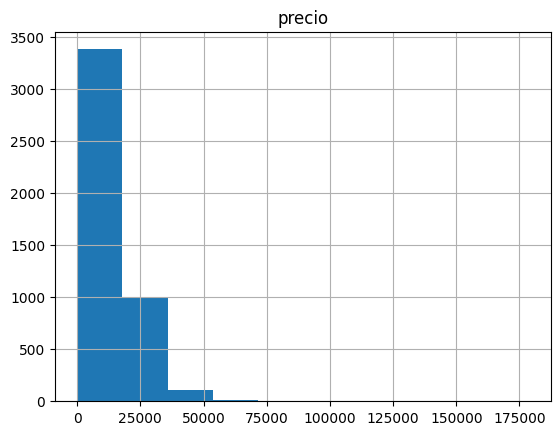

In [906]:
for i in df_9:
  if df_9[i].dtype.kind == "O":
    print(i,'\n', df_9[i].value_counts(), '\n')
  elif (df_9[i].dtype.kind=="f") or (df_9[i].dtype.kind=="i"):
    print(df_9.hist(i))

### **fecha_registro**

In [907]:
[df_9["fecha_registro"].value_counts() == 1].index #Crea una Serie booleana que indica qué fechas aparecen exactamente una vez, .index: Filtra y obtiene los índices (fechas) de las entradas que son True.

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [908]:
valores_unicos = df_9["fecha_registro"].value_counts()
filas_unicas = valores_unicos[valores_unicos == 1].index #identifica los valores unicos y los guarda en la variable filas_unicas.
print(filas_unicas)
#Vemos que hay un bastantes variables que aparecen una sola vez en la columna fecha_registro por lo que no vamos a eliminar las filas.

Index(['2001-01-01', '2006-03-01', '2006-06-01', '2003-09-01', '1997-01-01',
       '1999-03-01', '2001-03-01', '2004-10-01', '2016-12-01', '1999-06-01',
       '2007-05-01', '2004-06-01', '2017-02-01', '2004-08-01', '2017-07-01',
       '2005-02-01', '2009-12-01', '2004-11-01', '2004-03-01', '2016-11-01',
       '2006-04-01', '2016-08-01', '2017-11-01', '2001-09-01', '2007-02-01',
       '2009-03-01', '2003-06-01', '2009-06-01', '2007-09-01', '2003-04-01',
       '2003-11-01', '2002-09-01', '2009-10-01', '2001-02-01', '2005-01-01',
       '2002-06-01', '1999-11-01', '2004-01-01', '2003-07-01', '2007-01-01',
       '1990-03-01', '2016-05-01', '2006-11-01', '1994-01-01', '2005-09-01'],
      dtype='object', name='fecha_registro')


## **Correlación inicial**

In [909]:
df_9.head(20)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,No info,True,True,False,True,True,True,False,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,No info,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-03-01,diesel,otro,otro,True,True,False,True,True,True,True,25100.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,otro,True,True,False,False,True,True,False,6100.0,2018-02-01
9,320,139541.0,135.0,2012-04-01,diesel,white,otro,False,False,False,True,False,True,False,17300.0,2018-03-01
10,320,77115.0,135.0,2012-04-01,diesel,blue,otro,True,True,False,True,False,True,True,19300.0,2018-03-01
12,420,132025.0,135.0,2014-03-01,diesel,blue,No info,True,True,False,True,True,True,True,21700.0,2018-03-01
13,420,77061.0,135.0,2015-08-01,diesel,black,No info,True,True,False,True,True,True,True,36300.0,2018-03-01
14,120,174631.0,120.0,2009-01-01,diesel,otro,otro,True,True,False,False,False,True,False,10500.0,2018-04-01
15,120,208945.0,130.0,2008-04-01,diesel,grey,otro,True,True,False,True,False,True,False,8300.0,2018-04-01


In [910]:
corr = df_9.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,km,potencia,gps,precio
km,1.000000,-0.017049,0.166401,-0.408193
potencia,-0.017049,1.000000,-0.005034,0.604949
gps,0.166401,-0.005034,1.000000,-0.013751
precio,-0.408193,0.604949,-0.013751,1.000000


## **Vamos a transformas las variables booleanas a enteros.**

In [911]:
def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset.columns:
        unique_values = dataset[i].unique()

        # Detectar columnas numéricas
        if (dataset[i].dtype.kind in ["f", "i"]) and len(unique_values) != 2 and i not in target:
            lista_numericas.append(i)

        # Detectar columnas booleanas (revisadas)
        elif (dataset[i].dtype.kind == "b") and i not in target:
            lista_boolean.append(i)

        # Detectar columnas categóricas
        elif dataset[i].dtype.kind == "O" and i not in target:
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [912]:
obtener_lista_variables(df_9) #Vemos que hay columnas que las detecta como categoricas pero son booleanas, por lo que las transformaremos a booleanas.

(['km', 'potencia'],
 ['gps'],
 ['modelo',
  'fecha_registro',
  'tipo_gasolina',
  'color',
  'tipo_coche',
  'volante_regulable',
  'aire_acondicionado',
  'camara_trasera',
  'elevalunas_electrico',
  'bluetooth',
  'alerta_lim_velocidad',
  'fecha_venta'])

In [913]:
df_10=df_9.copy()

In [914]:
df_10['volante_regulable'] = df_10['volante_regulable'].astype('bool') #convertimos volante_regulable a booleano.


In [915]:
df_10['volante_regulable'].unique()

array([ True, False])

In [916]:
print(df_10.dtypes)

modelo                   object
km                      float64
potencia                float64
fecha_registro           object
tipo_gasolina            object
color                    object
tipo_coche               object
volante_regulable          bool
aire_acondicionado       object
camara_trasera           object
elevalunas_electrico     object
bluetooth                object
gps                        bool
alerta_lim_velocidad     object
precio                  float64
fecha_venta              object
dtype: object


In [917]:
obtener_lista_variables(df_10)

(['km', 'potencia'],
 ['volante_regulable', 'gps'],
 ['modelo',
  'fecha_registro',
  'tipo_gasolina',
  'color',
  'tipo_coche',
  'aire_acondicionado',
  'camara_trasera',
  'elevalunas_electrico',
  'bluetooth',
  'alerta_lim_velocidad',
  'fecha_venta'])

In [918]:
df_10['aire_acondicionado'] = df_10['aire_acondicionado'].astype('bool')
df_10['bluetooth'] = df_10['bluetooth'].astype('bool')
df_10['alerta_lim_velocidad'] = df_10['alerta_lim_velocidad'].astype('bool')
df_10['camara_trasera'] = df_10['camara_trasera'].astype('bool')
df_10['elevalunas_electrico'] = df_10['elevalunas_electrico'].astype('bool')

In [919]:
obtener_lista_variables(df_10) #ya tenemos las variables booleanas clasificadas correctamente

(['km', 'potencia'],
 ['volante_regulable',
  'aire_acondicionado',
  'camara_trasera',
  'elevalunas_electrico',
  'bluetooth',
  'gps',
  'alerta_lim_velocidad'],
 ['modelo',
  'fecha_registro',
  'tipo_gasolina',
  'color',
  'tipo_coche',
  'fecha_venta'])

In [920]:
df_11=df_10.copy()

In [921]:
label_encoder=LabelEncoder() #Creamos el codificador
df_11["volante_regulable"]=label_encoder.fit_transform(df_11["volante_regulable"])  #convertimos volante_regulable a entero. True es 1 False 0

In [922]:
df_11

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,No info,1,True,False,True,True,True,False,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,No info,0,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-03-01,diesel,otro,otro,1,True,False,True,True,True,True,25100.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,otro,1,True,False,False,True,True,False,6100.0,2018-02-01
9,320,139541.0,135.0,2012-04-01,diesel,white,otro,0,False,False,True,False,True,False,17300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,X1,73193.0,135.0,2013-03-01,diesel,black,otro,1,True,False,False,False,False,True,15600.0,2018-04-01
4815,320 Gran Turismo,137063.0,135.0,2014-08-01,diesel,white,otro,0,True,False,True,True,True,True,18600.0,2018-04-01
4817,320 Gran Turismo,97154.0,135.0,2013-10-01,diesel,black,No info,0,True,False,True,True,True,True,22800.0,2018-04-01
4818,X3,110039.0,130.0,2009-07-01,diesel,otro,No info,0,False,False,False,False,True,False,1300.0,2018-05-01


In [923]:
df_11["aire_acondicionado"]=label_encoder.fit_transform(df_11["aire_acondicionado"]) #convertimos aire acondicionado a entero. True es 1 False 0
df_11["bluetooth"]=label_encoder.fit_transform(df_11["bluetooth"]) #convertimos bluetooth a entero. True es 1 False 0
df_11["alerta_lim_velocidad"]=label_encoder.fit_transform(df_11["alerta_lim_velocidad"]) #convertimos alerta_lim_velocidad a entero. True es 1 False 0
df_11["camara_trasera"]=label_encoder.fit_transform(df_11["camara_trasera"]) #convertimos camara_trasera a entero. True es 1 False 0
df_11["elevalunas_electrico"]=label_encoder.fit_transform(df_11["elevalunas_electrico"]) #convertimos elevalunas_electrico a entero. True es 1 False 0
df_11["gps"]=label_encoder.fit_transform(df_11["gps"]) #convertimos gps a entero. True es 1 False 0


In [924]:
df_11.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,No info,1,1,0,1,1,1,0,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01,diesel,white,No info,0,0,0,1,0,1,0,10200.0,2018-02-01
3,420,128035.0,135.0,2014-03-01,diesel,otro,otro,1,1,0,1,1,1,1,25100.0,2018-02-01
7,118,115560.0,105.0,2009-08-01,petrol,white,otro,1,1,0,0,1,1,0,6100.0,2018-02-01
9,320,139541.0,135.0,2012-04-01,diesel,white,otro,0,0,0,1,0,1,0,17300.0,2018-03-01


##**CATEGORICAS A NUMÉRICAS**

### **tipo_gasolina numérica**

In [925]:
df_11["tipo_gasolina"].value_counts()

,count
tipo_gasolina,
diesel,4377
petrol,124


In [926]:
oe = OrdinalEncoder(categories=[['diesel','petrol']]) # Usamos la función OrdinalEncoder de sklearn para crear categorías ordenadas en diesel, petrol
df_11["tipo_gasolina_int"]=oe.fit_transform(df_11[['tipo_gasolina']]) # Creamos una nueva variable numérica de ingresos transformando la variable categórica con el OrdinalEncoder definido

In [927]:
del(df_11["tipo_gasolina"]) # Eliminamos la variable categórica tipo_gasolina del dataset

In [928]:
df_11

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_gasolina_int
0,118,140411.0,100.0,2012-02-01,black,No info,1,1,0,1,1,1,0,11300.0,2018-01-01,0.0
2,320,183297.0,120.0,2012-04-01,white,No info,0,0,0,1,0,1,0,10200.0,2018-02-01,0.0
3,420,128035.0,135.0,2014-03-01,otro,otro,1,1,0,1,1,1,1,25100.0,2018-02-01,0.0
7,118,115560.0,105.0,2009-08-01,white,otro,1,1,0,0,1,1,0,6100.0,2018-02-01,1.0
9,320,139541.0,135.0,2012-04-01,white,otro,0,0,0,1,0,1,0,17300.0,2018-03-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,X1,73193.0,135.0,2013-03-01,black,otro,1,1,0,0,0,0,1,15600.0,2018-04-01,0.0
4815,320 Gran Turismo,137063.0,135.0,2014-08-01,white,otro,0,1,0,1,1,1,1,18600.0,2018-04-01,0.0
4817,320 Gran Turismo,97154.0,135.0,2013-10-01,black,No info,0,1,0,1,1,1,1,22800.0,2018-04-01,0.0
4818,X3,110039.0,130.0,2009-07-01,otro,No info,0,0,0,0,0,1,0,1300.0,2018-05-01,0.0


### **color a numérica**

In [929]:
obtener_lista_variables(df_11) #vemos que nos faltan 5 variables categoricas para transformarlas en numericas.

(['km', 'potencia'],
 [],
 ['modelo', 'fecha_registro', 'color', 'tipo_coche', 'fecha_venta'])

In [930]:
df_12=df_11.copy()

In [931]:
oe = OrdinalEncoder(categories=[['black','otro','grey','blue','white']]) # Usamos la función OrdinalEncoder de sklearn para crear categorías ordenadas
df_12["color_int"]=oe.fit_transform(df_11[['color']])

In [932]:
del df_12['color']

In [933]:
df_12.head()

,modelo,km,potencia,fecha_registro,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_gasolina_int,color_int
0,118,140411.0,100.0,2012-02-01,No info,1,1,0,1,1,1,0,11300.0,2018-01-01,0.0,0.0
2,320,183297.0,120.0,2012-04-01,No info,0,0,0,1,0,1,0,10200.0,2018-02-01,0.0,4.0
3,420,128035.0,135.0,2014-03-01,otro,1,1,0,1,1,1,1,25100.0,2018-02-01,0.0,1.0
7,118,115560.0,105.0,2009-08-01,otro,1,1,0,0,1,1,0,6100.0,2018-02-01,1.0,4.0
9,320,139541.0,135.0,2012-04-01,otro,0,0,0,1,0,1,0,17300.0,2018-03-01,0.0,4.0


In [934]:
df_13=df_12.copy()

### **fechas a numérica**

In [935]:
df_13['fecha_venta'] = pd.to_datetime(df_13['fecha_venta'])
df_13['fecha_registro'] = pd.to_datetime(df_13['fecha_registro'])

df_13['diferencia_dias'] = (df_13['fecha_venta'] - df_13['fecha_registro']).dt.days # Calcular la diferencia en días

In [936]:
df_13

,modelo,km,potencia,fecha_registro,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_gasolina_int,color_int,diferencia_dias
0,118,140411.0,100.0,2012-02-01,No info,1,1,0,1,1,1,0,11300.0,2018-01-01,0.0,0.0,2161
2,320,183297.0,120.0,2012-04-01,No info,0,0,0,1,0,1,0,10200.0,2018-02-01,0.0,4.0,2132
3,420,128035.0,135.0,2014-03-01,otro,1,1,0,1,1,1,1,25100.0,2018-02-01,0.0,1.0,1433
7,118,115560.0,105.0,2009-08-01,otro,1,1,0,0,1,1,0,6100.0,2018-02-01,1.0,4.0,3106
9,320,139541.0,135.0,2012-04-01,otro,0,0,0,1,0,1,0,17300.0,2018-03-01,0.0,4.0,2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,X1,73193.0,135.0,2013-03-01,otro,1,1,0,0,0,0,1,15600.0,2018-04-01,0.0,0.0,1857
4815,320 Gran Turismo,137063.0,135.0,2014-08-01,otro,0,1,0,1,1,1,1,18600.0,2018-04-01,0.0,4.0,1339
4817,320 Gran Turismo,97154.0,135.0,2013-10-01,No info,0,1,0,1,1,1,1,22800.0,2018-04-01,0.0,0.0,1643
4818,X3,110039.0,130.0,2009-07-01,No info,0,0,0,0,0,1,0,1300.0,2018-05-01,0.0,1.0,3226


<Axes: >

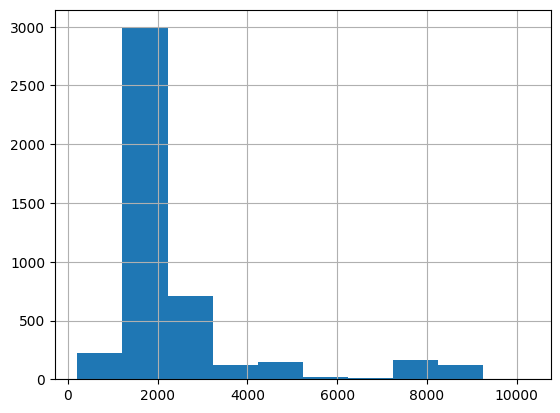

In [937]:
df_13['diferencia_dias'].hist()

In [938]:
del df_13['fecha_venta']
del df_13['fecha_registro'] #Eliminamos las columnas fecha_venta y fecha_registro

In [939]:
df_13["diferencia_dias_log"] = np.log10(df_13["diferencia_dias"])

In [940]:
del df_13["diferencia_dias"]

In [941]:
df_13.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tipo_gasolina_int,color_int,diferencia_dias_log
0,118,140411.0,100.0,No info,1,1,0,1,1,1,0,11300.0,0.0,0.0,3.334655
2,320,183297.0,120.0,No info,0,0,0,1,0,1,0,10200.0,0.0,4.0,3.328787
3,420,128035.0,135.0,otro,1,1,0,1,1,1,1,25100.0,0.0,1.0,3.156246
7,118,115560.0,105.0,otro,1,1,0,0,1,1,0,6100.0,1.0,4.0,3.492201
9,320,139541.0,135.0,otro,0,0,0,1,0,1,0,17300.0,0.0,4.0,3.334454


### **tipo_coche a numérica**

In [942]:
df_13["tipo_coche"].value_counts()

,count
tipo_coche,
No info,1356
estate,1081
sedan,773
suv,733
hatchback,424
otro,134


In [943]:
df_13 = pd.get_dummies(data=df_13, columns=['tipo_coche'], dtype=int)

In [944]:
df_13

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tipo_gasolina_int,color_int,diferencia_dias_log,tipo_coche_No info,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro,tipo_coche_sedan,tipo_coche_suv
0,118,140411.0,100.0,1,1,0,1,1,1,0,11300.0,0.0,0.0,3.334655,1,0,0,0,0,0
2,320,183297.0,120.0,0,0,0,1,0,1,0,10200.0,0.0,4.0,3.328787,1,0,0,0,0,0
3,420,128035.0,135.0,1,1,0,1,1,1,1,25100.0,0.0,1.0,3.156246,0,0,0,1,0,0
7,118,115560.0,105.0,1,1,0,0,1,1,0,6100.0,1.0,4.0,3.492201,0,0,0,1,0,0
9,320,139541.0,135.0,0,0,0,1,0,1,0,17300.0,0.0,4.0,3.334454,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,X1,73193.0,135.0,1,1,0,0,0,0,1,15600.0,0.0,0.0,3.268812,0,0,0,1,0,0
4815,320 Gran Turismo,137063.0,135.0,0,1,0,1,1,1,1,18600.0,0.0,4.0,3.126781,0,0,0,1,0,0
4817,320 Gran Turismo,97154.0,135.0,0,1,0,1,1,1,1,22800.0,0.0,0.0,3.215638,1,0,0,0,0,0
4818,X3,110039.0,130.0,0,0,0,0,0,1,0,1300.0,0.0,1.0,3.508664,1,0,0,0,0,0


### **modelo a numérica**

In [945]:
df_13["modelo"].value_counts()

,count
modelo,
320,747
520,631
318,563
X3,437
116,358
X1,274
316,233
X5,229
525,182


In [946]:
df_13 = pd.get_dummies(data=df_13, columns=["modelo"], dtype=int)  # Transformamos las variables categóricas mediante OHE usando get_dummies

In [947]:
df_13

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,modelo_520,modelo_525,modelo_530,modelo_535,modelo_730,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6
0,140411.0,100.0,1,1,0,1,1,1,0,11300.0,...,0,0,0,0,0,0,0,0,0,0
2,183297.0,120.0,0,0,0,1,0,1,0,10200.0,...,0,0,0,0,0,0,0,0,0,0
3,128035.0,135.0,1,1,0,1,1,1,1,25100.0,...,0,0,0,0,0,0,0,0,0,0
7,115560.0,105.0,1,1,0,0,1,1,0,6100.0,...,0,0,0,0,0,0,0,0,0,0
9,139541.0,135.0,0,0,0,1,0,1,0,17300.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,73193.0,135.0,1,1,0,0,0,0,1,15600.0,...,0,0,0,0,0,1,0,0,0,0
4815,137063.0,135.0,0,1,0,1,1,1,1,18600.0,...,0,0,0,0,0,0,0,0,0,0
4817,97154.0,135.0,0,1,0,1,1,1,1,22800.0,...,0,0,0,0,0,0,0,0,0,0
4818,110039.0,130.0,0,0,0,0,0,1,0,1300.0,...,0,0,0,0,0,0,1,0,0,0


# **correlación**

In [948]:
target=['precio'] # Definimos el target en una variable

In [949]:
target

['precio']

In [950]:
df_13["LOG_PRECIO"] = np.log10(df_13["precio"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

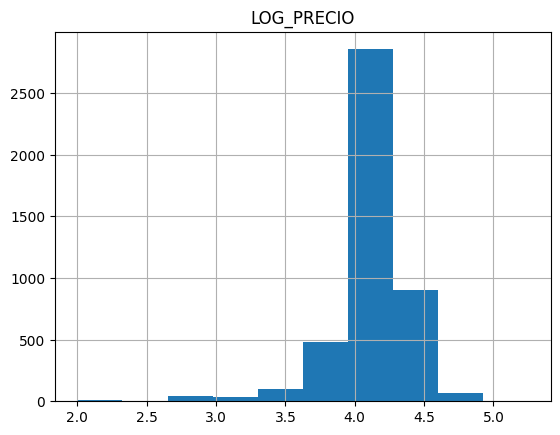

In [951]:
df_13.hist("LOG_PRECIO") # Histograma de la nueva variable LOG_PRECIO

In [952]:
del df_13["precio"]

## **Target vs features**

In [968]:
corr2 = df_13.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr2.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,tipo_gasolina_int,color_int,diferencia_dias_log,tipo_coche_No info,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro,tipo_coche_sedan,tipo_coche_suv,modelo_116,modelo_118,modelo_120,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_525,modelo_530,modelo_535,modelo_730,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,LOG_PRECIO
km,1.000000,-0.017049,0.071568,0.008909,0.002830,0.040810,-0.021181,0.166401,-0.023769,0.006868,-0.052607,0.257628,-0.003908,0.128094,-0.108946,-0.041429,0.064938,-0.104414,-0.127824,-0.038159,-0.013634,-0.006116,0.052426,0.002577,0.090361,-0.024328,-0.014931,-0.095802,-0.091775,0.027629,0.088368,0.099877,0.070079,0.025494,0.012375,-0.072677,-0.049185,-0.108892,-0.046179,-0.031841,-0.433995
potencia,-0.017049,1.000000,0.314123,0.209995,0.301283,0.364728,0.169547,-0.005034,0.523937,-0.001838,-0.027703,-0.094370,-0.007779,-0.010740,-0.229235,-0.099466,0.001643,0.247552,-0.352331,-0.119732,0.017881,-0.282649,-0.274011,-0.103941,0.006529,0.029787,0.152577,0.019154,0.019423,-0.082015,0.023426,0.154590,0.343317,0.307674,0.132806,-0.114667,0.086587,0.085569,0.436027,0.249527,0.481544
volante_regulable,0.071568,0.314123,1.000000,0.288371,0.241785,0.273094,0.119802,0.243898,0.237541,-0.035103,-0.051820,0.005079,-0.025720,0.016559,-0.139958,-0.040086,0.055565,0.085220,-0.194582,-0.119800,-0.037129,-0.130143,-0.091221,-0.043972,-0.087408,-0.011923,0.019831,0.017432,0.032387,0.068221,0.188233,0.101428,0.107641,0.065974,0.074185,-0.096576,0.063630,0.062870,0.153081,0.086166,0.231987
aire_acondicionado,0.008909,0.209995,0.288371,1.000000,0.125527,0.254262,0.093031,0.313791,0.223806,-0.073970,-0.034303,-0.097569,-0.019331,0.059288,-0.068197,-0.109287,0.055092,0.003409,-0.167494,-0.069980,-0.023959,-0.048054,-0.022462,0.049292,-0.094421,-0.000122,-0.000753,-0.002199,0.018883,0.056839,0.183211,0.017811,0.091773,0.057426,0.049111,-0.065897,-0.026869,0.011916,0.104142,0.034915,0.314946
camara_trasera,0.002830,0.301283,0.241785,0.125527,1.000000,0.188058,0.116613,0.065209,0.188115,0.008461,0.000724,-0.014180,0.006687,-0.021670,-0.049525,-0.051502,-0.017776,0.097806,-0.100486,-0.032822,-0.005331,-0.082470,-0.092361,-0.021163,-0.059216,0.014048,0.026435,-0.024269,0.031412,0.006893,0.016536,0.067363,0.086978,0.087967,0.104441,-0.021434,0.030585,0.001475,0.161088,0.103827,0.174038
elevalunas_electrico,0.040810,0.364728,0.273094,0.254262,0.188058,1.000000,0.229218,0.197634,0.342036,-0.014256,-0.042749,-0.115253,-0.004751,0.049953,-0.104295,-0.025636,0.011217,0.030964,-0.173741,-0.096295,0.003385,-0.154408,-0.150143,-0.036834,0.003922,0.038503,0.023847,0.089471,0.062963,0.104226,0.130947,0.096225,0.135743,0.069954,0.057732,-0.101251,0.022369,0.044999,0.107960,0.061944,0.325883
bluetooth,-0.021181,0.169547,0.119802,0.093031,0.116613,0.229218,1.000000,0.111717,0.074913,-0.010553,0.020428,-0.034898,-0.008138,-0.018159,0.039904,0.028778,-0.015574,0.002213,-0.050127,0.082017,0.022994,-0.072875,-0.041898,0.027961,0.005410,0.053423,0.042868,0.115277,0.034426,-0.038502,-0.047529,0.014375,0.045755,0.104905,-0.036843,-0.077485,0.036318,0.009229,0.019115,0.018679,0.160353
gps,0.166401,-0.005034,0.243898,0.313791,0.065209,0.197634,0.111717,1.000000,-0.060839,-0.057232,-0.080045,0.040392,-0.004072,0.062598,-0.006865,0.010819,0.038392,-0.106128,0.033516,0.008518,-0.035334,0.011126,0.035139,0.021750,-0.034169,-0.007371,-0.029791,-0.009871,0.002447,0.018182,0.065583,0.023932,0.041620,0.027094,0.023170,-0.127299,-0.081767,-0.034127,0.030241,0.017391,0.035260
alerta_lim_velocidad,-0.023769,0.523937,0.237541,0.223806,0.188115,0.342036,0.074913,-0.060839,1.000000,-0.034400,-0.016651,-0.123198,-0.001188,-0.005234,-0.182148,-0.096251,0.028415,0.166913,-0.275684,-0.127790,-0.042337,-0.161772,-0.198955,-0.048377,-0.067552,0.06

In [954]:
MinMax = MinMaxScaler() # Definimos la función de sklearn que vamos a usar

In [955]:
lista_numericas=obtener_lista_variables(df_13)[0] # Obtenemos la lista de variables numéricas

In [956]:
lista_numericas

['km', 'potencia', 'color_int', 'diferencia_dias_log', 'LOG_PRECIO']

In [957]:
df_13.value_counts()

km        potencia  volante_regulable  aire_acondicionado  camara_trasera  elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad  tipo_gasolina_int  color_int  diferencia_dias_log  tipo_coche_No info  tipo_coche_estate  tipo_coche_hatchback  tipo_coche_otro  tipo_coche_sedan  tipo_coche_suv  modelo_116  modelo_118  modelo_120  modelo_316  modelo_318  modelo_318 Gran Turismo  modelo_320  modelo_320 Gran Turismo  modelo_330  modelo_420  modelo_420 Gran Coupé  modelo_518  modelo_520  modelo_525  modelo_530  modelo_535  modelo_730  modelo_X1  modelo_X3  modelo_X4  modelo_X5  modelo_X6  LOG_PRECIO
476.0     120.0     1                  1                   0               0                     1          1    1                     0.0                3.0        3.199481             0                   0                  1                     0                0                 0               0           0           0           0           0           0                        0           0                        0           0           1                      0           0           0           0           0           0           0          0          0          0          0          4.481443      1
164900.0  100.0     0                  1                   0               0                     0          1    0                     0.0                1.0        3.479143             0                   1                  0                     0                0                 0               0           0           0           0           1           0                        0           0                        0           0           0                      0           0           0           0           0           0           0          0          0          0          0          3.863323      1
164998.0  140.0     1                  1                   1               1                     0          1    1                     0.0                3.0        3.127429             1                   0                  0                     0                0                 0               0           0           0           0           0           0                        0           0                        0           0           0                      0           1           0           0           0           0           0          0          0          0          0          4.403121      1
          85.0      1                  1                   0               0                     0          1    0                     0.0                0.0        3.275311             0                   1                  0                     0                0                 0               0           0           0           1           0           0                        0           0                        0           0           0                      0           0           0           0           0           0           0          0          0          0          0          4.045323      1
164973.0  135.0     0                  0                   0               0                     0          1    0                     0.0                3.0        3.340642             0                   1                  0                     0                0                 0               0           0           0           0           0           0                        1           0                        0           0           0                      0           0           0           0           0           0           0          0          0          0          0          2.903090      1
                                                                                                                                                                                                                                                                                                                                                         

In [958]:
df_13[lista_numericas] = MinMax.fit_transform(df_13[lista_numericas]) # Transformamos las variables numéricas del dataset con MinMaxScaler

In [960]:
df_14=df_13.copy()